In [0]:

'''======
run once, then comment it off, and run again
========'''
#!git clone https://github.com/songqsh/foo1.git 
pass

In [0]:
#cd foo1/src/
pass

In [0]:
#!pip install ipdb
pass

In [0]:
from hjb_mdp_nn_1 import *

# Goal: Implementation of HJB-MDP from NN

>>>>Elliptic Linear PDE with 1-dim
>>>>MDP with 1-dim 8 mesh num
Sequential(
  (0): Linear(in_features=1, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)
Epoch [50000/500000], Loss: 0.0014
Epoch [100000/500000], Loss: 0.0013
Epoch [150000/500000], Loss: 0.0013
Epoch [200000/500000], Loss: 0.0012
Epoch [250000/500000], Loss: 0.0012
Epoch [300000/500000], Loss: 0.0011
Epoch [350000/500000], Loss: 0.0011
Epoch [400000/500000], Loss: 0.0011
Epoch [450000/500000], Loss: 0.0011
Epoch [500000/500000], Loss: 0.0010
>>>time elapsed is: 2355.10408782959
>>>L2-error-norm: 0.01465772646607085
[0.25012916326522827, 0.23226134479045868, 0.21439355611801147, 0.19652576744556427, 0.17865797877311707, 0.16079017519950867, 0.16824939846992493, 0.2002153992652893, 0.2499033510684967]


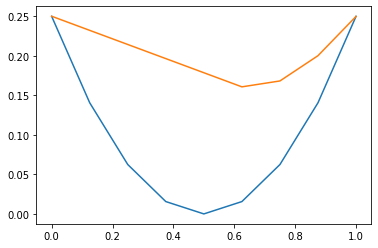

In [26]:
torch.manual_seed(0)
p = Pde(n_dim_=1); m = Mdp(p, n_mesh_= 8, method='cfd')
value = solver(m, n_epoch=500000)
######check solution
err =0
for ix1 in deep_iter(*m.v_shape_):
    s1 = m.i2s(ix1)
    v1 = value(torch.FloatTensor(s1)).item()
    exact_v1 =p.exact_soln(s1) 
    err1 = v1-exact_v1
    err += err1**2

err = err/m.v_size_
print('>>>L2-error-norm: '+str(err))


if p.n_dim_==1:
    cod_x = []; cod_y=[]; cod_y_pred = []
    for ix1 in deep_iter(*m.v_shape_):
        s1 = m.i2s(ix1); cod_x += [s1,]
        v1 = value(torch.FloatTensor(s1)).item(); cod_y_pred += [v1,]
        exact_v1 =p.exact_soln(s1); cod_y += [exact_v1,]

    plt.plot(cod_x, cod_y, cod_x, cod_y_pred)

print(cod_y_pred)